# Packages

In [1]:
import numpy              as np
import pandas             as pd
import matplotlib.pyplot  as plt
import seaborn            as sns
import arviz
import time
import os
from mpl_toolkits.mplot3d import Axes3D

# Paths and dataset

In [2]:
results_path = '../../LargeFilesResults/Model/'  # where the outputs of this notebook will be saved

In [3]:
posteriors = pd.read_csv(os.path.join(results_path, 'posteriors_noemlines.csv'))
summary    = pd.read_csv(os.path.join(results_path, 'fit_summ_noemlines.csv'))

In [4]:
parameters = summary[['LOG_STELLAR_MASS', 'Z']]

# Posteriors

In [ ]:
posteriors

In [ ]:
whan_classes = ['Not classified', 'Retired/Passive', 'wAGN', 'sAGN', 'SF']
palette      = np.array(['#e41a1c', '#ff7f00', '#4daf4a', '#377eb8','#984ea3'])
figsize      = (18, 18)
alpha        = 0.4

In [ ]:
# dimensions = posteriors.columns.values.reshape(5,5)
# rows       = dimensions[:,0].size
# columns    = dimensions[0,:].size

In [ ]:
# plt.subplots(figsize=figsize)
# position = 1
# for each_beta in range(rows):
#     for each_class in range(columns):
#         name_temp = posteriors.columns.values.reshape(rows, columns)[each_beta,each_class]
#         plot_temp = plt.subplot(rows, columns, position)
#         sns.kdeplot(posteriors['%s' % str(name_temp)], shade=True, alpha=alpha, color=palette[each_beta])
#         plt.legend(loc='upper right', fontsize=15)
#         plt.axvline(x=0, linestyle="--", color='black')
#         plt.xlabel(r"%s" % str(name_temp), fontsize=20)
#         plt.tick_params('both', labelsize='20')
#         plt.xlim([-1.5,1.5])
#         plt.ylim([0,4.5])      
#         if (each_class==0):
#             plt.ylabel("$\,$ WHAN \n %s" % whan_classes[each_beta], fontsize=20)       
#         elif (each_class!=0): 
#             plot_temp.yaxis.set_visible(False)            
#         position+=1

# plt.tight_layout()
# plt.savefig(os.path.join(results_path, '25betas_shared_revised.png'), bbox_inch='tight')
# plt.savefig(os.path.join(results_path, '25betas_shared_revised.pdf'), bbox_inch='tight')
# plt.show()

# Simplifying the probabilities' dataframe

In [5]:
entire_fit = pd.read_csv(os.path.join(results_path, 'entirefit_noemlines.csv'))

In [6]:
entire_fit.keys()

Index(['chain', 'draw', 'warmup', 'beta[1]', 'beta[2]', 'beta[3]', 'beta[4]',
       'beta[5]', 'eta[1]', 'eta[2]',
       ...
       'pnew[898]', 'pnew[899]', 'pnew[900]', 'lp__', 'accept_stat__',
       'stepsize__', 'treedepth__', 'n_leapfrog__', 'divergent__', 'energy__'],
      dtype='object', length=2319)

In [ ]:
header = np.array(entire_fit.keys())

In [ ]:
prob_keys = []
for i in header:
    if i[0:4]=='prob':
        prob_keys.append(i)
    else:
        continue

In [ ]:
probabilities = entire_fit[prob_keys]

In [ ]:
probabilities

In [ ]:
probabilities_transposed = probabilities.T

In [ ]:
print(probabilities_transposed.columns)

In [ ]:
iterations = probabilities_transposed.columns.size
new_header = []
for i in range(iterations):
    new_header.append('itr%i' % i)
print(len(new_header))

In [ ]:
probabilities_transposed.columns = new_header

In [ ]:
probabilities_transposed

In [ ]:
percentiles = [0.025, 0.25, 0.50, 0.75, 0.975]

In [ ]:
lines = probabilities_transposed.iloc[:, 0].size

for i in range(lines):   
    if i==0:
        stats_temp    = probabilities_transposed.iloc[i, :].describe(percentiles=percentiles)
        shrinked_temp = pd.DataFrame(stats_temp)
    else:
        stats_temp    = pd.DataFrame(probabilities_transposed.iloc[i, :].describe(percentiles=percentiles))
        shrinked_temp = shrinked_temp.join(stats_temp)
shrinked_df = shrinked_temp.T
shrinked_df

In [ ]:
print(shrinked_df.values.shape, parameters.shape)

In [ ]:
loc = shrinked_df.iloc[0, :].size
print(loc)

In [ ]:
shrinked_df.insert(loc=loc, value=parameters['LOG_STELLAR_MASS'].values, column='LOG_STELLAR_MASS')

In [ ]:
shrinked_df.insert(loc=(loc+1), value=parameters['Z'].values, column='Z')

In [ ]:
shrinked_df

In [ ]:
shrinked_df.to_csv(os.path.join(results_path, 'allprobabilities_summ_revised.csv'))

In [ ]:
step = 900
prob01 = shrinked_df.iloc[:step, :]
prob02 = shrinked_df.iloc[step:(step*2), :]
prob03 = shrinked_df.iloc[(step*2):(step*3), :]
prob04 = shrinked_df.iloc[(step*3):(step*4), :]
prob05 = shrinked_df.iloc[(step*4):(step*5), :]

### Testing first class

In [ ]:
zu = np.unique(prob01['LOG_STELLAR_MASS'].values)

In [ ]:
subset = prob01[prob01['LOG_STELLAR_MASS'].values==zu[6]]

In [ ]:
plt.plot(subset['Z'], subset['50%'], '--')
plt.plot(subset['Z'], subset['25%'], '--')
plt.plot(subset['Z'], subset['75%'], '--')
plt.ylim([0,0.5])
plt.show()

In [ ]:
np.unique(prob01['Z'].values)

In [ ]:
subset = prob01[prob01['Z']<0.07]

In [ ]:
subset

In [ ]:
plt.plot(subset['LOG_STELLAR_MASS'], subset['mean'], '--')
plt.plot(subset['LOG_STELLAR_MASS'], subset['25%'], '--')
plt.plot(subset['LOG_STELLAR_MASS'], subset['75%'], '--')
plt.show()

# Checking automatic summary from STAN

In [7]:
summary_stan = pd.read_csv(os.path.join(results_path, 'fit_summ_noemlines.csv'))

In [8]:
summary_stan

,parameter,mean,se_mean,sd,2.5%,25%,50%,75%,97.5%,n_eff,Rhat,Z,LOG_STELLAR_MASS
0,pnew[1],0.340,0.002000,0.129,0.120,0.246,0.329,0.424,0.619,4516,1.000,0.067940,9.0
1,pnew[2],0.379,0.002000,0.134,0.142,0.283,0.370,0.468,0.659,4432,1.000,0.077608,9.0
2,pnew[3],0.418,0.002000,0.137,0.164,0.319,0.412,0.513,0.698,4267,1.000,0.087275,9.0
3,pnew[4],0.455,0.002000,0.140,0.187,0.354,0.453,0.554,0.730,4064,1.000,0.096943,9.0
4,pnew[5],0.490,0.002000,0.143,0.211,0.388,0.491,0.592,0.764,3854,1.000,0.106610,9.0
5,pnew[6],0.523,0.002000,0.145,0.232,0.422,0.527,0.627,0.791,3660,1.000,0.116278,9.0
6,pnew[7],0.553,0.002000,0.146,0.254,0.451,0.560,0.659,0.814,3493,1.001,0.125946,9.0
7,pnew[8],0.580,0.003000,0.146,0.274,0.480,0.589,0.687,0.836,3355,1.001,0.135613,9.0
8,pnew[9],0.604,0.003000,0.146,0.293,0.506,0.616,0.712,0.856,3245,1.001,0.145281,9.0
9,pnew[10],0.626,0.003000,0.146,0.310,0.529,0.639,0.734,0.870,3158,1.001,0.154948,9.0


In [9]:
np.unique(summary_stan['LOG_STELLAR_MASS'].values)

array([ 9.        ,  9.06896552,  9.13793103,  9.20689655,  9.27586207,
        9.34482759,  9.4137931 ,  9.48275862,  9.55172414,  9.62068966,
        9.68965517,  9.75862069,  9.82758621,  9.89655172,  9.96551724,
       10.03448276, 10.10344828, 10.17241379, 10.24137931, 10.31034483,
       10.37931034, 10.44827586, 10.51724138, 10.5862069 , 10.65517241,
       10.72413793, 10.79310345, 10.86206897, 10.93103448, 11.        ])

In [12]:
chosen_mass = np.unique(summary_stan['LOG_STELLAR_MASS'].values)[25]

In [13]:
chosen_mass

10.724137931034482

In [14]:
subset_temp = summary_stan[summary_stan['LOG_STELLAR_MASS']==chosen_mass]

In [ ]:
# subset_temp

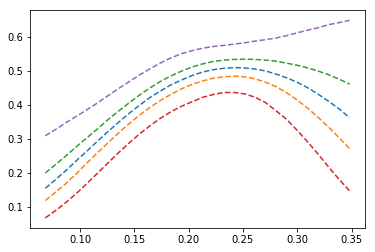

In [15]:
plt.plot(subset_temp['Z'], subset_temp['50%'], '--')
plt.plot(subset_temp['Z'], subset_temp['25%'], '--')
plt.plot(subset_temp['Z'], subset_temp['75%'], '--')
plt.plot(subset_temp['Z'], subset_temp['2.5%'], '--')
plt.plot(subset_temp['Z'], subset_temp['97.5%'], '--')
plt.show()

In [21]:
np.unique(summary_stan['Z'].values)

array([0.06794   , 0.07760759, 0.08727517, 0.09694276, 0.10661034,
       0.11627793, 0.12594552, 0.1356131 , 0.14528069, 0.15494828,
       0.16461586, 0.17428345, 0.18395103, 0.19361862, 0.20328621,
       0.21295379, 0.22262138, 0.23228897, 0.24195655, 0.25162414,
       0.26129172, 0.27095931, 0.2806269 , 0.29029448, 0.29996207,
       0.30962966, 0.31929724, 0.32896483, 0.33863241, 0.3483    ])

In [39]:
chosen_z = np.unique(summary_stan['Z'].values)[5]

In [40]:
chosen_z

0.11627793103448275

In [41]:
subset_temp = summary_stan[summary_stan['Z']==chosen_z]

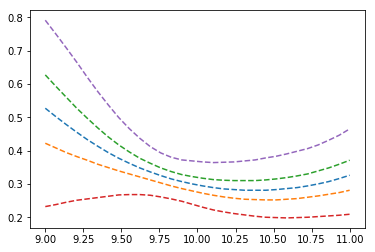

In [42]:
plt.plot(subset_temp['LOG_STELLAR_MASS'], subset_temp['50%'], '--')
plt.plot(subset_temp['LOG_STELLAR_MASS'], subset_temp['25%'], '--')
plt.plot(subset_temp['LOG_STELLAR_MASS'], subset_temp['75%'], '--')
plt.plot(subset_temp['LOG_STELLAR_MASS'], subset_temp['2.5%'], '--')
plt.plot(subset_temp['LOG_STELLAR_MASS'], subset_temp['97.5%'], '--')
plt.show()

In [ ]:
# %matplotlib notebook

In [ ]:
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.plot_trisurf(prob01_stan['Z'], prob01_stan['LOG_STELLAR_MASS'], prob01_stan['mean'], color='#a6611a', alpha=0.8, 
#                 linewidth=0, antialiased=False)
# ax.plot_trisurf(prob01['Z'], prob01['LOG_STELLAR_MASS'], prob01['mean'], color='blue', alpha=0.8, 
#                 linewidth=0, antialiased=False)
# ax.set_xlabel("\n z", fontsize=14)
# ax.set_ylabel("\n Log M$_*$ (M$_\odot$)", fontsize=14)
# ax.set_zlabel("\n Probability of \n UV upturn", fontsize=14)
# for t in ax.yaxis.get_major_ticks(): t.label.set_fontsize(10)
# ax.set_yticks([9.75, 10.25, 10.75, 11.25, 11.75])
# ax.view_init(elev=22., azim=315)
# plt.show()

In [ ]:
# prob01.boxplot(column='50%')

In [ ]:
# prob01_stan.boxplot(column='50%')

# Last check to be 100% sure (for one class - class 1 - lineless)

In [ ]:
m = 0.01
z = np.arange(0., 0.35, 0.01)
p = posteriors

In [ ]:
# regression = []
regression_temp = []
for i in range(p['beta[1,1]'].values.size):
    for redshift in range(z.size):
        a = p['beta[1,1]'].values[i]
        b = p['beta[2,1]'].values[i] * z[redshift]
        c = p['beta[3,1]'].values[i] * z[redshift]**2
        d = p['beta[4,1]'].values[i] * m
        e = p['beta[5,1]'].values[i] * m**2
        
        f_x = np.sum([a,b,c,d,e])
        p_i = 1./(1+np.exp(-f_x))
        
        
        
        
        regression_temp.append([p_i, z[redshift], int(i)])
regression = np.array(regression_temp)

In [ ]:
prob  = regression[:,0]
redsh = regression[:,1]
beta  = regression[:,2]

In [ ]:
idx = np.where(beta<=10)

In [ ]:
plt.plot(redsh[idx], prob[idx], '-', alpha=0.8)
plt.xlabel("Z")
plt.ylabel("prob")
plt.ylim([0,1.1])
plt.show()